## IMPACT OF TECHNOLOGY ANALYSIS
 
In this analysis we want to see how the technology ector has performed over the years in comparison to the S&P500 and what is its contribution in the growth of S&P500 and we will also look at so famous tech stocks. In this analysis we will try to find the answer to the follwing questions:
- 1. How has technology outperformed S&P500?
- 2. What is the impact of FAANG stocks?

### 1. How has technology outperformed S&P500?

For this analysis we need to gather data for a technology alone etf to compart it to S&P500. For this we will take into consideration XLK which is the Technology select sector SPDR fund which was started in 1998 so we will compare it with S&P500 from 1998. XLK is chosen because it is an etf that hass all teh technology companies in the S&P500 which would be perfect for our comparison.

In [2]:
import pandas as pd
import yfinance as yf # need to import yahoo finance in order download stock data directly from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# first we need to download XLK data from yfinance
tech_etf = yf.Ticker('XLK')
tech_etf_df = tech_etf.history(period='max')

In [4]:
tech_etf_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1998-12-22 00:00:00-05:00,24.377931,24.448456,23.907769,24.107588,300500,0.0,0.0,0.0
1998-12-23 00:00:00-05:00,24.636526,24.683542,24.189871,24.683542,338300,0.0,0.0,0.0
1998-12-24 00:00:00-05:00,24.683537,24.683537,24.495472,24.589504,243700,0.0,0.0,0.0
1998-12-28 00:00:00-05:00,24.965642,24.965642,24.518987,24.660036,309300,0.0,0.0,0.0
1998-12-29 00:00:00-05:00,24.777577,24.836347,24.448463,24.730560,123800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-09-13 00:00:00-04:00,219.610001,220.990005,218.720001,220.440002,4023700,0.0,0.0,0.0
2024-09-16 00:00:00-04:00,218.850006,220.300003,217.570007,219.600006,3448900,0.0,0.0,0.0
2024-09-17 00:00:00-04:00,221.800003,222.139999,218.059998,219.169998,3495000,0.0,0.0,0.0


In [5]:
tech_etf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6477 entries, 1998-12-22 00:00:00-05:00 to 2024-09-19 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           6477 non-null   float64
 1   High           6477 non-null   float64
 2   Low            6477 non-null   float64
 3   Close          6477 non-null   float64
 4   Volume         6477 non-null   int64  
 5   Dividends      6477 non-null   float64
 6   Stock Splits   6477 non-null   float64
 7   Capital Gains  6477 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 455.4 KB


In [6]:
# S&P500 data from 1998-12-22 for comparison with XLK
sp500 = yf.Ticker('^GSPC')  # ^gspc is the ticker for sp500 
sp500_df = sp500.history(start='1998-12-22')

In [7]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22 00:00:00-05:00,1202.839966,1209.219971,1192.719971,1203.569946,680500000,0.0,0.0
1998-12-23 00:00:00-05:00,1203.569946,1229.890015,1203.569946,1228.540039,697500000,0.0,0.0
1998-12-24 00:00:00-05:00,1228.540039,1229.719971,1224.849976,1226.270020,246980000,0.0,0.0
1998-12-28 00:00:00-05:00,1226.270020,1231.520020,1221.170044,1225.489990,531560000,0.0,0.0
1998-12-29 00:00:00-05:00,1225.489990,1241.859985,1220.780029,1241.810059,586490000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,0.0,0.0
2024-09-16 00:00:00-04:00,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,0.0,0.0
2024-09-17 00:00:00-04:00,5655.509766,5670.810059,5614.049805,5634.580078,3443600000,0.0,0.0


In order to compary the two normalization is required becasue it will help in starting both funds from the same baseline which will give us accurate results for comparison.

In [8]:
# for normilization divide the closing value with the starting close value of the fund as it helps to compare percentage change of the closing price of both funds over time.
sp500_df['Normalized_Close'] = sp500_df['Close'] / sp500_df['Close'].iloc[0]
tech_etf_df['Normalized_Close'] = tech_etf_df['Close'] / tech_etf_df['Close'].iloc[0]

In [9]:
sp500_df['Cumulative_Return'] = (1 + sp500_df['Close'].pct_change()).cumprod()
tech_etf_df['Cumulative_Return'] = (1 + tech_etf_df['Close'].pct_change()).cumprod()

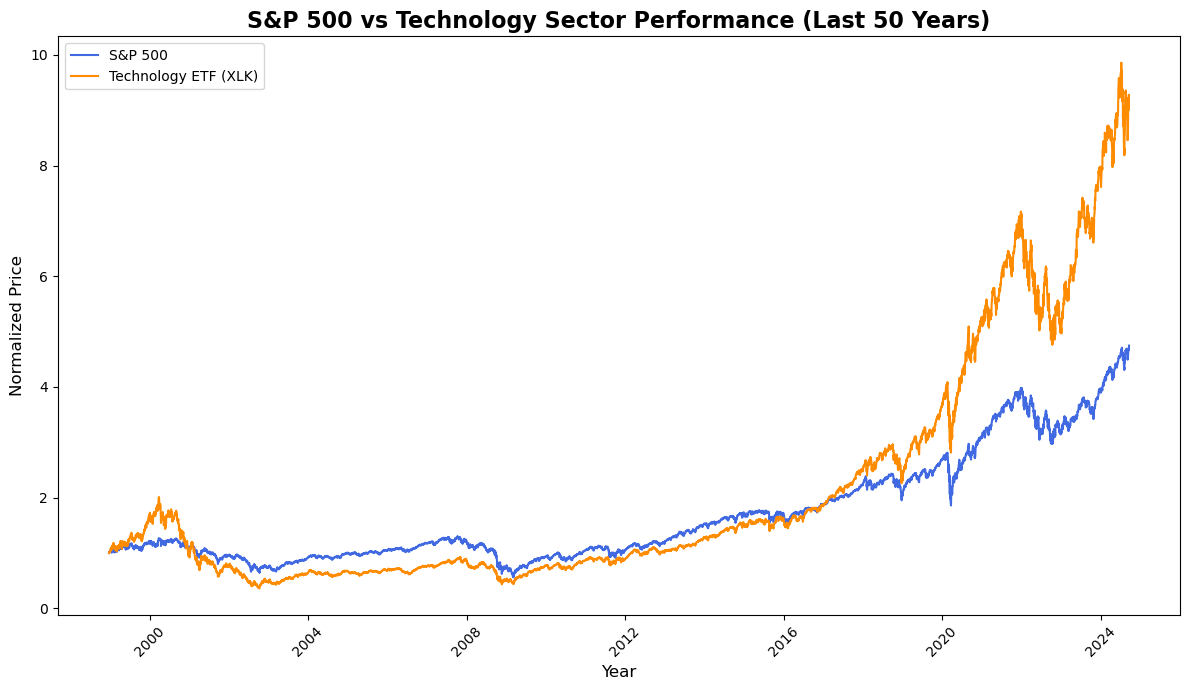

In [10]:
#now we can graph the comparison
plt.figure(figsize=(12, 7))
sns.lineplot(data=sp500_df, x=sp500_df.index, y='Normalized_Close', label='S&P 500', color='royalblue')
sns.lineplot(data=tech_etf_df, x=tech_etf_df.index, y='Normalized_Close', label='Technology ETF (XLK)', color='darkorange')

plt.title('S&P 500 vs Technology Sector Performance (Last 50 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

From the graph we can clerly see that technology sector has dramatically outperformed S&P500 especially since 2016-2017 which would be the start of the rise of AI.

### 2. What is the impact of FAANG stocks?

FAANG stocks- facebook-meta, apple, amazon, netflix, google are the most influencial and successful stocks over the recent years. These companies are known for their innovation, cultural impact, market dominance and financial performace that is why we need to look at their impact.

In [13]:

# created a fun to fetch data
def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)['Adj Close']


# Set date range
start_date = '2000-01-01'
end_date = '2023-12-31'

# List of tech companies and their tickers
tech_companies = {
    'Facebook': 'META',
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Netflix': 'NFLX',
    'Google': 'GOOGL',
}

# Download data
faang = pd.DataFrame()
for company, ticker in tech_companies.items():
    faang[company] = fetch_data(ticker, start_date, end_date)
faang['S&P 500'] = fetch_data('^GSPC', start_date, end_date)
# Calculate cumulative returns- because there are different satrt date for different companies so this is prefered for normalization
cumulative_returns = (1 + faang.pct_change()).cumprod()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
faang

,Facebook,Amazon,Apple,Netflix,Google,S&P 500
Date,,,,,,
2012-05-18,38.115238,10.692500,15.996171,9.994286,14.987913,1295.219971
2012-05-21,33.927845,10.905500,16.928106,10.248571,15.330158,1315.989990
2012-05-22,30.906942,10.766500,16.798124,9.672857,14.997898,1316.630005
2012-05-23,31.903940,10.864000,17.207991,10.272857,15.214080,1318.859985
2012-05-24,32.930851,10.762000,17.049961,10.038571,15.069293,1320.680054
...,...,...,...,...,...,...
2023-12-22,352.329163,153.419998,192.868149,486.760010,141.140518,4754.629883
2023-12-26,353.764832,153.410004,192.320221,491.190002,141.170441,4774.750000
2023-12-27,356.755829,153.339996,192.419830,491.790009,140.023270,4781.580078


In [15]:
cumulative_returns

,Facebook,Amazon,Apple,Netflix,Google,S&P 500
Date,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,0.890139,1.019921,1.058260,1.025443,1.022835,1.016036
2012-05-22,0.810882,1.006921,1.050134,0.967839,1.000666,1.016530
2012-05-23,0.837039,1.016039,1.075757,1.027873,1.015090,1.018252
2012-05-24,0.863981,1.006500,1.065878,1.004431,1.005430,1.019657
...,...,...,...,...,...,...
2023-12-22,9.243788,14.348375,12.057145,48.703832,9.416956,3.670905
2023-12-26,9.281454,14.347440,12.022891,49.147085,9.418952,3.686439
2023-12-27,9.359927,14.340893,12.029118,49.207120,9.342413,3.691713


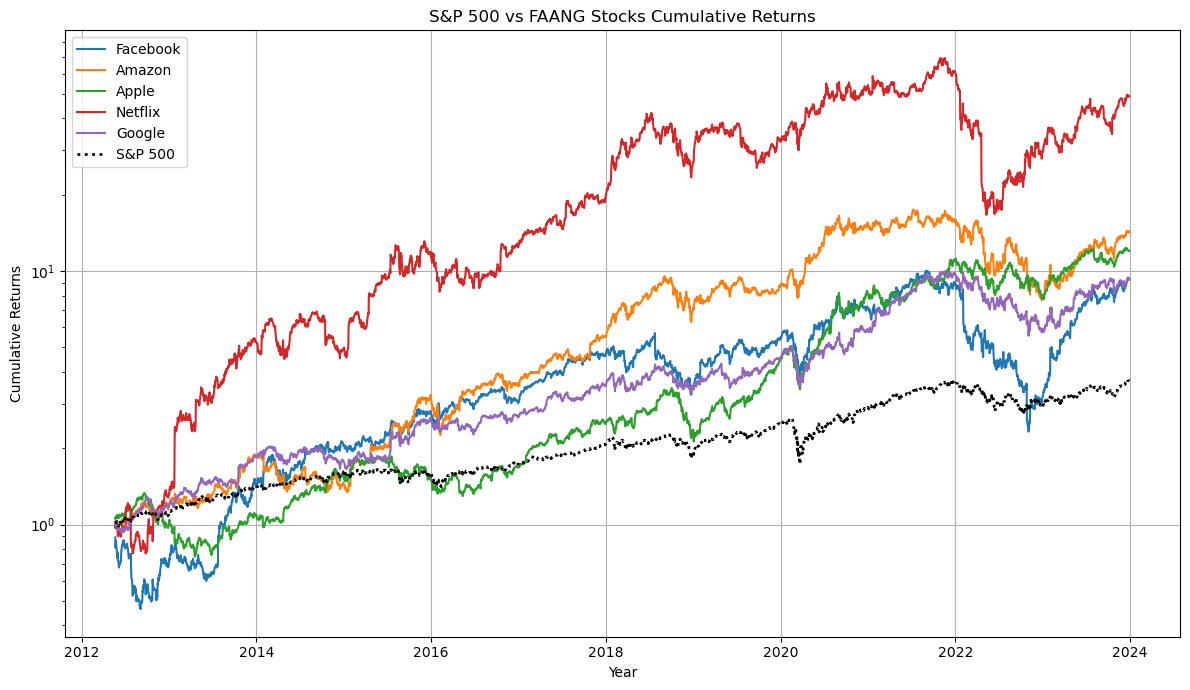

In [22]:
# Plotting
plt.figure(figsize=(12, 7))
#for column in cumulative_returns.columns:
    #plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
for company in tech_companies:
    plt.plot(cumulative_returns[company], label=company)
plt.plot(cumulative_returns['S&P 500'], label='S&P 500', color='black', linestyle=':', linewidth=2)

plt.title('S&P 500 vs FAANG Stocks Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.yscale('log')  # Use log scale for better visualization of returns
plt.grid(True)
plt.tight_layout()
plt.show()

The faang stocks have outperformed the S&P500 as one can see for META,APPLE overall while others have outperformed during different time intervals. However there is volititlity during covid times which can be clearly seen which will be discussed in our next analysis.